# 运行环境：
Win10 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]

# 使用的包及版本
numpy: 1.19.2

pandas: 1.1.3

matplotlib: 3.3.2

seaborn: 0.11.0

statsmodels: 0.13.0

sklearn: 0.23.2

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan as NA
import statsmodels
import sklearn

# 复现步骤

# 一、数据导入
本文选择了Bank Marketing Data Set 进行分析，目的是预测客户是否将认购定期存款

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 二、数据清洗

In [3]:
data = data.replace('unknown', NA)
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

有缺失值的变量为job,marital,education,default,housing,loan

由于缺失值数量较多，使用众数进行补充

In [4]:
data['job'] = data['job'].fillna('admin.')
data['marital'] = data['marital'].fillna('married')
data['education'] = data['education'].fillna('university.degree')
data['housing'] = data['housing'].fillna('yes')
data['default'] = data['default'].fillna('no')
data['loan'] = data['loan'].fillna('no')

# 三、描述性统计

## 1.分类型变量
### 条形图   

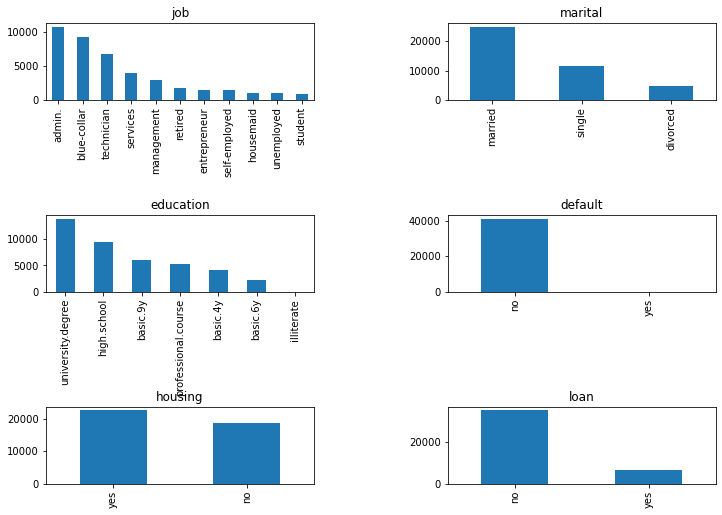

In [5]:
def bar(vars):
    plt.figure(figsize = (12,12))
    for i, j in enumerate(vars):
        plt.subplot(4, 2, i+1)
        data[j].value_counts().plot(kind='bar', title=j)
    plt.subplots_adjust(wspace = 0.5, hspace = 1.5)
    
vars = ['job', 'marital', 'education', 'default', 'housing', 'loan']
bar(vars)

### 复式条形图

D:\Anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'loan vs y')

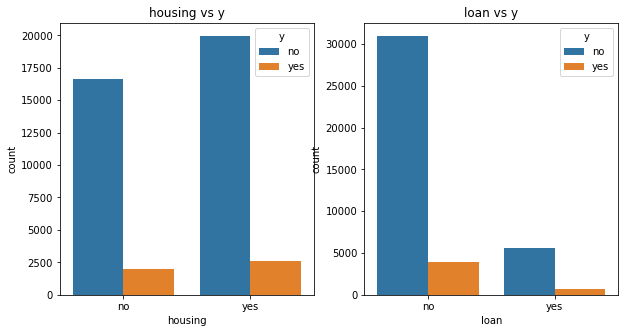

In [6]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot('housing', hue='y', data=data, ax=ax[0])
sns.countplot('loan', hue='y', data=data, ax=ax[1])
ax[0].set_title('housing vs y')
ax[1].set_title('loan vs y')

## 2.数值型变量

### 箱线图

Text(0.5, 1.0, 'age vs y')

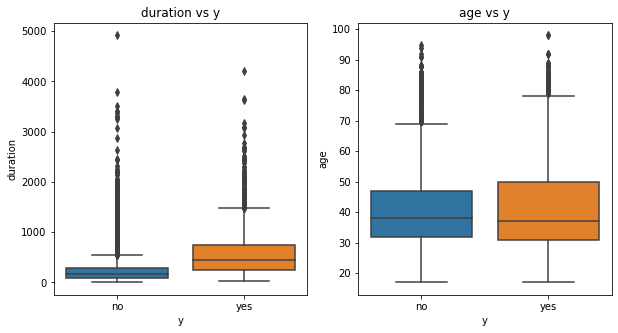

In [7]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='y', y='duration', data=data, ax=ax[0])
sns.boxplot(x='y', y='age', data=data, ax=ax[1])
ax[0].set_title('duration vs y')
ax[1].set_title('age vs y')

# 四、数据预处理
## 1.分类型变量转化为数值型

In [8]:
data.drop(['day_of_week','month'], axis=1, inplace=True)
dummy = pd.get_dummies(data[['job','marital','education','default','housing','loan','contact','poutcome']])
data = pd.concat([dummy, data], axis=1)
data.drop(['job','marital','education','default','housing','loan','contact','poutcome'], inplace=True, axis=1)
for field in [ 'y']:
    data[field] = pd.Categorical(list(data[field])).codes

## 2.划分训练集和测试集

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
X = data[data.columns[:-1]]  
X = preprocessing.scale(X=X, with_mean=True, with_std=True, copy=True)
X = sm.add_constant(X)
y = data.y 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=100)

# 五、建模

In [10]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
class Result:
    def __init__(self,Xtrain,ytrain,Xtest,ytest,model):
        if not (type(Xtrain)==np.ndarray and type(Xtest)==np.ndarray and type(ytrain)==pd.core.series.Series and type(ytest)==pd.core.series.Series):
            raise TypeError('类型错误')
        self.Xtrain = Xtrain
        self.ytrain = ytrain
        self.Xtest = Xtest
        self.ytest = ytest
        self.model = model
    def predict(self):
        self.model.fit(Xtrain, ytrain)
        ypred = self.model.predict(Xtest)
        matrix = metrics.confusion_matrix(ytest, ypred)
        return matrix
    def accuracy(self):
        accuracy_score = self.model.score(Xtest, ytest)
        return accuracy_score
    def roc_auc(self):
        ypred = self.model.predict(Xtest)
        auc = roc_auc_score(ytest, ypred)
        fpr,tpr,thresholds = roc_curve(ytest, ypred)
        return [auc,tpr,fpr]
        
        

In [12]:
logistics = Result(Xtrain,ytrain,Xtest,ytest,LogisticRegression())
tree = Result(Xtrain,ytrain,Xtest,ytest,DecisionTreeClassifier())
rfc =  Result(Xtrain,ytrain,Xtest,ytest,RandomForestClassifier(n_estimators=180, max_depth=14, random_state=90))

In [13]:
logistics.predict()
log_a = logistics.accuracy()
log_r_a = logistics.roc_auc()

In [14]:
tree.predict()
tree_a = tree.accuracy()
tree_r_a = tree.roc_auc()

In [15]:
rfc.predict()
rfc_a = rfc.accuracy()
rfc_r_a = rfc.roc_auc()

In [16]:
result = pd.DataFrame()
result['model'] = ['logistic', 'DecisionTree', 'RandomForest']
result['accuracy_score'] = [log_a,tree_a,rfc_a]
result['auc'] = [log_r_a[0],tree_r_a[0],rfc_r_a[0]]

In [ ]:
result

# 六、比较

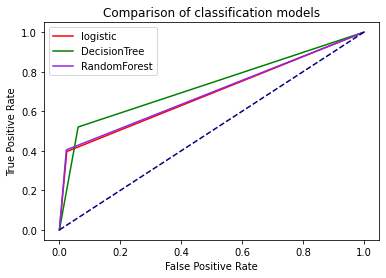

In [18]:
plt.plot(log_r_a[2], log_r_a[1] , color='red',label='logistic')
plt.plot(tree_r_a[2] , tree_r_a[1] , color='green',label='DecisionTree')
plt.plot(rfc_r_a[2], rfc_r_a[1], color='blueviolet',label='RandomForest')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of classification models')
plt.legend()
plt.show()

# 七、结论：
- 预测准确率最高的是随机森林，最低的是决策树。
- auc值最高的是决策树和随机森林，最低的是logistic
- 综合两个指标，最终选择随机森林作为预测模型。